In [1]:
pip install -q tensorflow_data_validation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install apache-beam

In [3]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
print('TF version:', tf.__version__)
print('TFDV version:', tfdv.version.__version__)

TF version: 2.15.0
TFDV version: 1.14.0


In [4]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
class TCL_trip():
  def get_null_count(self, df):
    column_names = list(df.columns)
    null_values = list(df.isnull().sum().values)
    ser = pd.Series(null_values,column_names)
    null_dict = {}
    for key, value in ser.items():
      if value !=0:
        null_dict[key] = value
    return null_dict
  def get_info(self, dataframe):
    dataframe = dataframe.reset_index()
    print("Basic information about dataset")
    print("-------------------------------------------------------------------------------------------")
    print(f"Number of Rows : {len(dataframe.index)}", end='\n\n')
    print(f"{dataframe.index}", end ="\n\n")
    print(f"Number of columns :{len(dataframe.columns)}", end='\n\n')
    print(f"column Name : {np.array(dataframe.columns)}", end='\n\n')
    print("Columns which has null values : ", self.get_null_count(dataframe), end='\n\n')

  def handle_null(self, data):
    data.dropna(subset=['passenger_count'], inplace=True)
    data = data[data['trip_distance'] != 0]
    data = data[data['passenger_count'] != 0]
    del data['airport_fee']
    return data

  def feature_eng(self, data):
    data['DO_year'] = data['tpep_dropoff_datetime'].dt.year
    data['DO_month'] = data['tpep_dropoff_datetime'].dt.month
    data['DO_day'] = data['tpep_dropoff_datetime'].dt.day
    data['DO_hour'] = data['tpep_dropoff_datetime'].dt.hour
    data['DO_minute'] = data['tpep_dropoff_datetime'].dt.minute
    data['DO_second'] = data['tpep_dropoff_datetime'].dt.second

    data['PU_year'] = data['tpep_pickup_datetime'].dt.year
    data['PU_month'] = data['tpep_pickup_datetime'].dt.month
    data['PU_day'] = data['tpep_pickup_datetime'].dt.day
    data['PU_hour'] = data['tpep_pickup_datetime'].dt.hour
    data['PU_minute'] = data['tpep_pickup_datetime'].dt.minute
    data['PU_second'] = data['tpep_pickup_datetime'].dt.second

    del data['tpep_dropoff_datetime']
    del data['tpep_pickup_datetime']

    return data

  def transdorm_to_numeric(self, data):
    data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace('Y', 1)
    data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace('N', 0)

    return data

  def convert_neg_amount(self, data):
    columns = ['fare_amount', 'extra',
                'mta_tax','tip_amount', 'tolls_amount', 'improvement_surcharge',
                'congestion_surcharge']
    for item in columns:
      data[item] = data[item].abs()
    data.loc[data['mta_tax'] != 0, 'mta_tax'] = 0.50
    data.loc[data['improvement_surcharge'] != 0, 'improvement_surcharge'] = 0.30
    data['total_amount'] = data['fare_amount']+data['extra']+data['mta_tax']+data['tip_amount']+data['tolls_amount']+data['improvement_surcharge']+data['congestion_surcharge']

    return data

  def box_plot(self, data):
    col = ['VendorID', 'RatecodeID','store_and_fwd_flag','payment_type','PULocationID','DOLocationID',]
    for item in col:
      print(f"{item} :",data[item].unique())
      print("---------------------------------------------------------------------------------------------------------------")
    columns =  ['passenger_count', 'trip_distance',
                  'fare_amount', 'extra','mta_tax',
                'tip_amount', 'tolls_amount', 'improvement_surcharge',
                'total_amount', 'congestion_surcharge']
    for column in columns:
        plt.figure(figsize=(8, 6))
        data.boxplot(column=[column])
        plt.title(column)
        plt.show()
        print("-------------------------------------------------------------------------------------------------------------")

  def correlation(self, data):
    correlation_matrix = data.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix of NYC Yellow Taxi Trip Records Features")
    plt.show()

  def load_jan_data(self):
    data = pd.read_parquet("/content/drive/MyDrive/Deep Learning/project1/yellow_tripdata_2020-01.parquet")
    data = self.handle_null(data)
    data = self.feature_eng(data)
    data = self.transdorm_to_numeric(data)
    data = self.convert_neg_amount(data)
    data.info()
    self.get_info(data)
    return data

  def load_evaluvation_data(self):
    data = pd.read_parquet("/content/drive/MyDrive/Deep Learning/project1/yellow_tripdata_2020-05.parquet")
    data = self.handle_null(data)
    data = self.feature_eng(data)
    data = self.transdorm_to_numeric(data)
    data = self.convert_neg_amount(data)
    data.info()
    self.get_info(data)
    return data


###column discription :
**VendorID** : A code indicating the TPEP provider that provided the record.

1= Creative Mobile Technologies, LLC;

2= VeriFone Inc.

**tpep_pickup_datetime** : The date and time when the meter was engaged.

**tpep_dropoff_datetime**: The date and time when the meter was disengaged.

**Passenger_count** : The number of passengers in the vehicle.This is a driver-entered value.

**Trip_distance** : The elapsed trip distance in miles reported by the taximeter.

**PULocationID TLC** : Taxi Zone in which the taximeter was engaged

**DOLocationID TLC** : Taxi Zone in which the taximeter was disengaged

**RateCodeID** : The final rate code in effect at the end of the trip.

1= Standard rate

2=JFK

3=Newark

4=Nassau or Westchester

5=Negotiated fare

6=Group ride

**Store_and_fwd_flag** : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

**Payment_type** : A numeric code signifying how the passenger paid for the trip.

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip

**Fare_amount** :The time-and-distance fare calculated by the meter.Extra Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and $1 rush hour and overnight charges.

**MTA_tax** : 0.50 MTA tax that is automatically triggered based on the metered rate in use.

**Improvement_surcharge** : 0.30 improvement surcharge assessed trips at the flag drop.The improvement surcharge began being levied in 2015.

**Tip_amount** : Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

**Tolls_amount** :Total amount of all tolls paid in trip.

**Total_amount** :The total amount charged to passengers. Does not include cash tips.

**Congestion_Surcharge** : Total amount collected in trip for NYS congestion surcharge. Airport_fee 1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [18]:
train_data = pd.read_parquet("/content/drive/MyDrive/Deep Learning/project1/yellow_tripdata_2020-03.parquet")
evaluate_data = pd.read_parquet("/content/drive/MyDrive/Deep Learning/project1/yellow_tripdata_2020-05.parquet")

In [19]:
ytt = TCL_trip()

In [20]:
ytt.get_info(train_data)

Basic information about dataset
-------------------------------------------------------------------------------------------
Number of Rows : 3007687

RangeIndex(start=0, stop=3007687, step=1)

Number of columns :20

column Name : ['index' 'VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'fare_amount' 'extra'
 'mta_tax' 'tip_amount' 'tolls_amount' 'improvement_surcharge'
 'total_amount' 'congestion_surcharge' 'airport_fee']

Columns which has null values :  {'passenger_count': 37808, 'RatecodeID': 37808, 'store_and_fwd_flag': 37808, 'congestion_surcharge': 37808, 'airport_fee': 3007687}



In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [49]:
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,DO_day,DO_hour,DO_minute,DO_second,PU_year,PU_month,PU_day,PU_hour,PU_minute,PU_second
count,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2876143.0,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,...,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06,2.876143e+06
mean,1.683996e+00,1.501938e+00,2.855565e+00,1.037129e+00,1.0,1.638348e+02,1.612673e+02,1.264781e+00,1.250350e+01,1.068489e+00,...,8.456409e+00,1.382664e+01,2.967190e+01,2.950935e+01,2.020000e+03,2.999888e+00,8.451096e+00,1.375103e+01,2.961702e+01,2.951892e+01
std,4.649145e-01,1.113504e+00,3.624146e+00,5.244657e-01,0.0,6.632685e+01,7.050721e+01,4.709010e-01,3.958552e+02,1.229764e+00,...,5.667340e+00,5.853496e+00,1.743869e+01,1.731901e+01,2.670401e-02,2.120255e-02,5.669898e+00,5.792004e+00,1.733443e+01,1.731632e+01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.008000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.160000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,...,4.000000e+00,1.000000e+01,1.500000e+01,1.500000e+01,2.020000e+03,3.000000e+00,4.000000e+00,1.000000e+01,1.500000e+01,1.500000e+01
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.0,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,...,7.000000e+00,1.400000e+01,3.000000e+01,2.900000e+01,2.020000e+03,3.000000e+00,7.000000e+00,1.400000e+01,3.000000e+01,3.000000e+01
75%,2.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.0,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,...,1.200000e+01,1.900000e+01,4.500000e+01,4.500000e+01,2.020000e+03,3.000000e+00,1.200000e+01,1.800000e+01,4.500000e+01,4.500000e+01
max,2.000000e+00,9.000000e+00,3.109000e+02,9.900000e+01,1.0,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,3.030000e+01,...,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


- The dataset contains a substantial amount of data with 3,007,687 rows and 20 columns.
- Each row represents a single taxi trip, and each column provides specific details about that trip.
- The output shows the column names that contain null values.


#Handling missing or null values

In [22]:
train_data = ytt.handle_null(train_data)

- The rows that have null values in the passenger_count column also have null values in all other columns. Therefore, I have dropped all rows with null values.
- I have also dropped the `airport_fee` column since the entire column contained null values.


In [23]:
ytt.get_info(train_data)

Basic information about dataset
-------------------------------------------------------------------------------------------
Number of Rows : 2876143

RangeIndex(start=0, stop=2876143, step=1)

Number of columns :19

column Name : ['index' 'VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'fare_amount' 'extra'
 'mta_tax' 'tip_amount' 'tolls_amount' 'improvement_surcharge'
 'total_amount' 'congestion_surcharge']

Columns which has null values :  {}



#Performing Feature Engineering

In [24]:
train_data = ytt.feature_eng(train_data)

- The `tpep_dropoff_datetime` and `tpep_pickup_datetime` columns are split into separate components such as year, month, day, hour, minute, and second. New columns are created for both drop-off and pickup times. Subsequently, the original datetime columns are deleted from the dataset.

In [25]:
train_data[[ 'DO_year',
 'DO_month', 'DO_day', 'DO_hour', 'DO_minute','DO_second', 'PU_year',
 'PU_month', 'PU_day', 'PU_hour', 'PU_minute', 'PU_second']]

,DO_year,DO_month,DO_day,DO_hour,DO_minute,DO_second,PU_year,PU_month,PU_day,PU_hour,PU_minute,PU_second
0,2020,3,1,1,1,42,2020,3,1,0,31,13
2,2020,3,1,0,59,16,2020,3,1,0,52,18
3,2020,3,1,0,50,57,2020,3,1,0,47,53
5,2020,3,1,0,23,17,2020,3,1,0,4,43
6,2020,3,1,1,14,36,2020,3,1,0,43,21
...,...,...,...,...,...,...,...,...,...,...,...,...
2969874,2020,3,31,23,21,26,2020,3,31,23,18,36
2969875,2020,3,31,23,50,17,2020,3,31,23,39,18
2969876,2020,3,31,23,31,54,2020,3,31,23,24,48
2969877,2020,3,31,23,44,23,2020,3,31,23,41,3


#Transform categorical data into numerical values

In [26]:
train_data['store_and_fwd_flag']

0          N
2          N
3          N
5          Y
6          Y
          ..
2969874    N
2969875    N
2969876    N
2969877    N
2969878    N
Name: store_and_fwd_flag, Length: 2876143, dtype: object

In [28]:
train_data = ytt.transdorm_to_numeric(train_data)


- All columns in the dataset are of either integer or float type, except for store_and_fwd_flag, which is categorized as an object type. This column originally contained categorical values "yes" or "no". To transform it into a numerical format for analysis, the values "yes" were replaced with 1, and "no" with 0.

In [29]:
train_data['store_and_fwd_flag']

0          1
2          1
3          1
5          1
6          1
          ..
2969874    1
2969875    1
2969876    1
2969877    1
2969878    1
Name: store_and_fwd_flag, Length: 2876143, dtype: int64

#convert all non negative amounts into positive numbers

In [30]:
negative_mask = (train_data[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']] < 0).any(axis=1)

negative_values_df = train_data[negative_mask]

print(negative_values_df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']])

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
302             -2.5   -0.5     -0.5         0.0           0.0   
803             -5.0   -0.5     -0.5         0.0           0.0   
956            -19.0   -0.5     -0.5         0.0           0.0   
985             -5.5   -0.5     -0.5         0.0           0.0   
1015           -10.5   -0.5     -0.5         0.0           0.0   
...              ...    ...      ...         ...           ...   
2969090         -4.0   -0.5     -0.5         0.0           0.0   
2969346        -16.5   -0.5     -0.5         0.0           0.0   
2969348         -4.0   -0.5     -0.5         0.0           0.0   
2969398        -21.5   -0.5     -0.5         0.0           0.0   
2969695         -7.5   -0.5     -0.5         0.0           0.0   

         improvement_surcharge  congestion_surcharge  
302                       -0.3                  -2.5  
803                       -0.3                  -2.5  
956                       -0.3            

In [31]:
train_data = ytt.convert_neg_amount(train_data)

In [32]:
negative_mask = (train_data[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']] < 0).any(axis=1)

negative_values_df = train_data[negative_mask]

print(negative_values_df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']])

Empty DataFrame
Columns: [fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, congestion_surcharge]
Index: []


- I have observed columns such as fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, and congestion_surcharge contained some negative values.
- To rectify this, the negative values in these columns were converted into positive values. Then, the total amount for each taxi trip was calculated by summing up all these modified charge amounts.


#Look for outliers

VendorID : [1 2]
---------------------------------------------------------------------------------------------------------------
RatecodeID : [ 1.  2.  4.  5. 99.  3.  6.]
---------------------------------------------------------------------------------------------------------------
store_and_fwd_flag : [1]
---------------------------------------------------------------------------------------------------------------
payment_type : [1 2 4 3]
---------------------------------------------------------------------------------------------------------------
PULocationID : [ 88 246 151 113 237 234 148 211 158  79 249 161 230 114 162 137  74 142
 223 100 232  68  45 166 170 125 236 239 107  87 144 231 164 163 143  50
   4 132  90  48 264 262 229  25  65 186 140 255  41  24 138 238  66  33
 263 141 224  43 146 226 181 244   7 233  40 209 145  13 261  89  97  75
  80 256  42  52 116 225 188 179 257 189 215 157 127 243 131 106 168 260
 129  82 152 112  17 213  61  54  69 217 120  35 159  37  60  

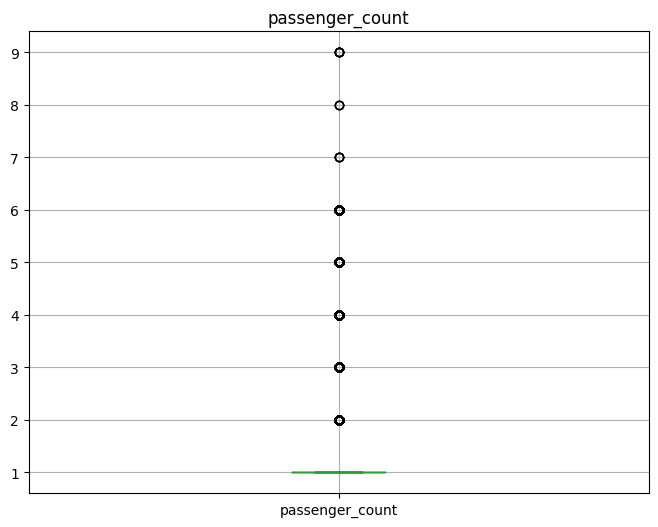

-------------------------------------------------------------------------------------------------------------


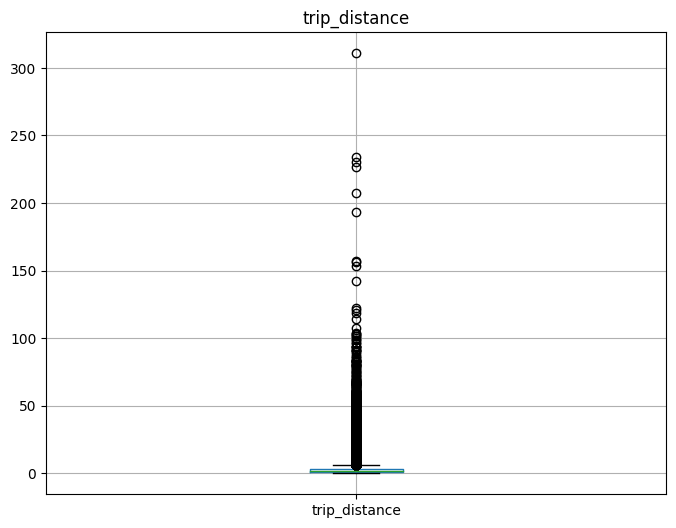

-------------------------------------------------------------------------------------------------------------


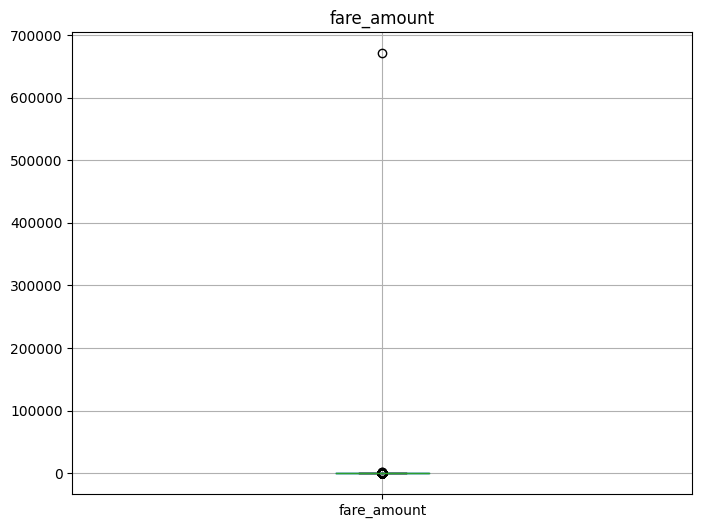

-------------------------------------------------------------------------------------------------------------


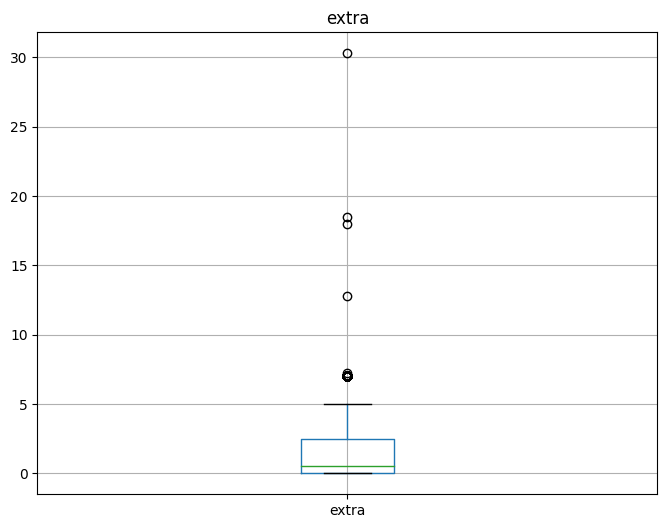

-------------------------------------------------------------------------------------------------------------


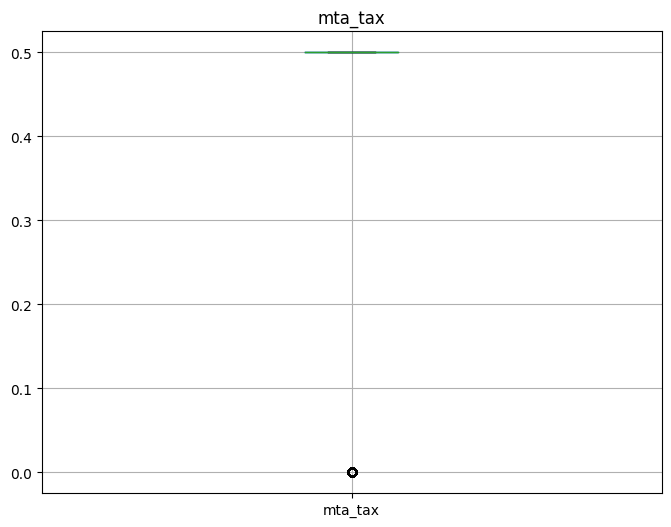

-------------------------------------------------------------------------------------------------------------


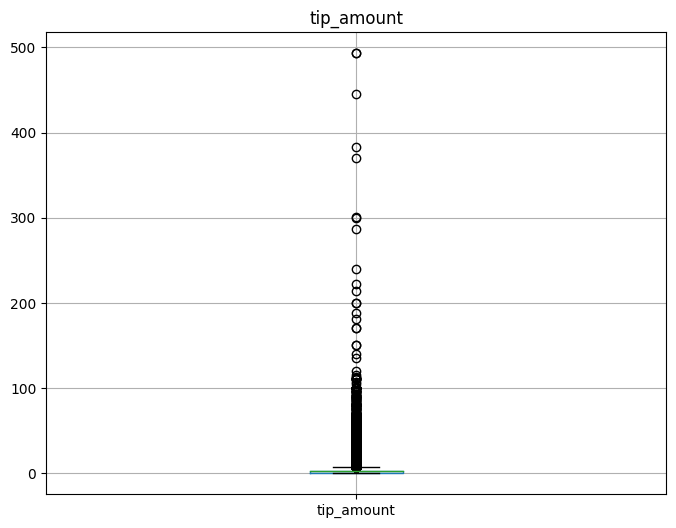

-------------------------------------------------------------------------------------------------------------


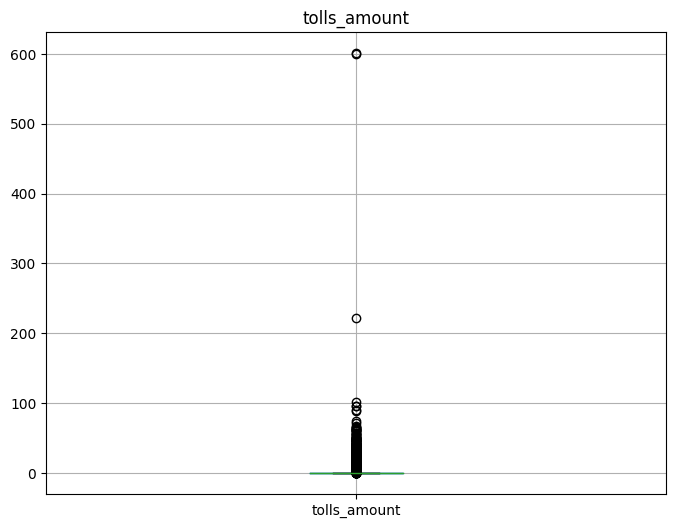

-------------------------------------------------------------------------------------------------------------


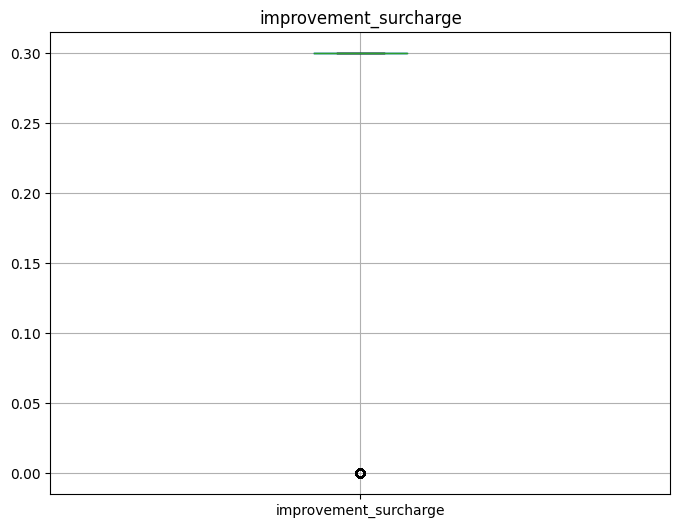

-------------------------------------------------------------------------------------------------------------


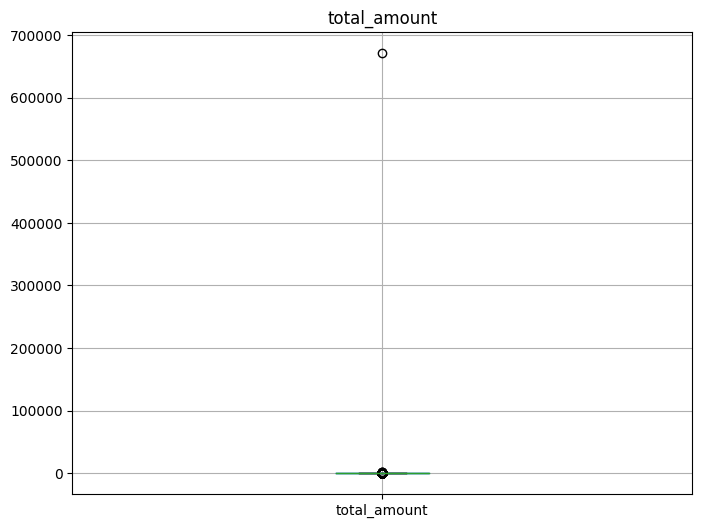

-------------------------------------------------------------------------------------------------------------


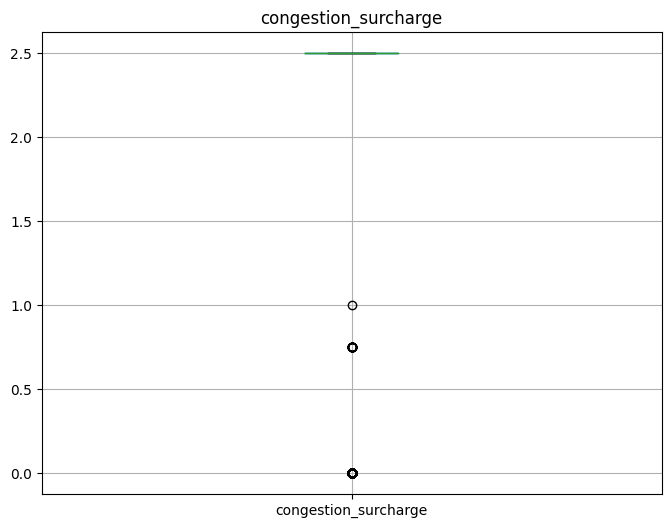

-------------------------------------------------------------------------------------------------------------


In [33]:
ytt.box_plot(train_data)


- The 'passenger_count' boxplot indicates that the number of single passenger trips is notably higher compared to trips with more than two passengers. Consequently, the plot identifies the range of 2 to 8 passengers as potential anomalies within the dataset.

- The 'trip_distance' boxplot shows that the majority of trips cover distances within 20 miles, followed by a moderate amount between 20 to 100 miles, and notably fewer trips exceeding 100 miles

- Since the pandemic broke out in March 2020, evident abnormal patterns can be observed in the application of fare amount, MTA tax, improvement surcharge, tip amount, tolls amount, and congestion surcharge.

- From all the box plots, it is evident that most columns contain outliers. However, i'm not going  to handle/remove them for two main reasons:
1. Abnormal patterns observed during the pandemic may influence the presence of outliers.
2. Handling outliers could result in the loss of original data


- The may 2020 data has been loaded and preprocessed with all necessary steps, making it ready for Evaluation.

In [34]:
evaluate_data = ytt.load_evaluvation_data()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271044 entries, 1 to 289513
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               271044 non-null  int64  
 1   passenger_count        271044 non-null  float64
 2   trip_distance          271044 non-null  float64
 3   RatecodeID             271044 non-null  float64
 4   store_and_fwd_flag     271044 non-null  int64  
 5   PULocationID           271044 non-null  int64  
 6   DOLocationID           271044 non-null  int64  
 7   payment_type           271044 non-null  int64  
 8   fare_amount            271044 non-null  float64
 9   extra                  271044 non-null  float64
 10  mta_tax                271044 non-null  float64
 11  tip_amount             271044 non-null  float64
 12  tolls_amount           271044 non-null  float64
 13  improvement_surcharge  271044 non-null  float64
 14  total_amount           271044 non-nu

In [35]:
#Due to large size of the dataset the execution will crash abruptly hence i have separated preprocessing of data and visualization modules.
train = pd.read_csv("/content/drive/MyDrive/Deep Learning/project1/yt_data_2020-03.csv")
evaluate = pd.read_csv("/content/drive/MyDrive/Deep Learning/project1/yt_data_2020-05.csv")

#Graphical statistics generated by tensorflow data validation

The output generated by the TensorFlow Data Validation (TFDV) functions helps in understanding the statistical properties of  dataset.


In [36]:
train_stats = tfdv.generate_statistics_from_dataframe(train_data)
tfdv.visualize_statistics(train_stats)

- The output generated by the TensorFlow Data Validation (TFDV) functions helps in understanding the statistical properties of the dataset.
- The function computes statistics for each feature in the dataset. It calculates a variety of statistics such as mean, median, min, max, number of missing values, number of unique values, standard deviation, and more.
- These statistics help to understand the distribution and characteristics of the data in each column
 for example :
 - In 'passenger_count' histogram, it is noticeable that there are more trips with a single passenger compared to those with two passengers, suggesting that trips with more than two passengers are less common.
- In 'trip_distance' histogram, the majority of trip distances fall within 30 miles, indicating that trips exceeding 30 miles are less common.


#Schema:

 This schema defines the expected types and properties of each feature. It helps in ensuring that new data is compatible with the model.

In [37]:
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,required,,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,required,,-
'store_and_fwd_flag',INT,required,,-
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


#Feature Comparisons:
 This section compares the statistics between the datasets. It helps to ensure that the distributions of features are similar across different datasets.

- I utilized the March 2020 data for training and the May 2020 data for evaluation. Now, we can compare these two datasets using TensorFlow Data Validation.



In [38]:
eval_stats = tfdv.generate_statistics_from_dataframe(evaluate)

In [39]:
tfdv.visualize_statistics(lhs_statistics=eval_stats, rhs_statistics=train_stats,
                          lhs_name='EVAL_DATASET', rhs_name='TRAIN_DATASET')

- As observed in the histograms, the distribution of various features in the training dataset appears to be quite similar to that of the evaluation dataset.

#Anomalies/Issues:

TFDV can also detect anomalies or issues in the dataset. These could include missing values, high cardinality (too many unique values), or drift between different versions of the dataset.

In [40]:
anomalies = tfdv.validate_statistics(statistics=train_stats, schema=schema)
tfdv.display_anomalies(anomalies)

In [41]:
anomalies = tfdv.validate_statistics(statistics=eval_stats, schema=schema)
tfdv.display_anomalies(anomalies)

,Anomaly short description,Anomaly long description
Feature name,,
'__index_level_0__',Column dropped,Column is completely missing


#Presenting dependencies and correlations among the various features in the data.

- A heatmap provides a visual summary of the relationships between features in a dataset. It helps in understanding which features move together, which move in opposite directions, and which are independent.

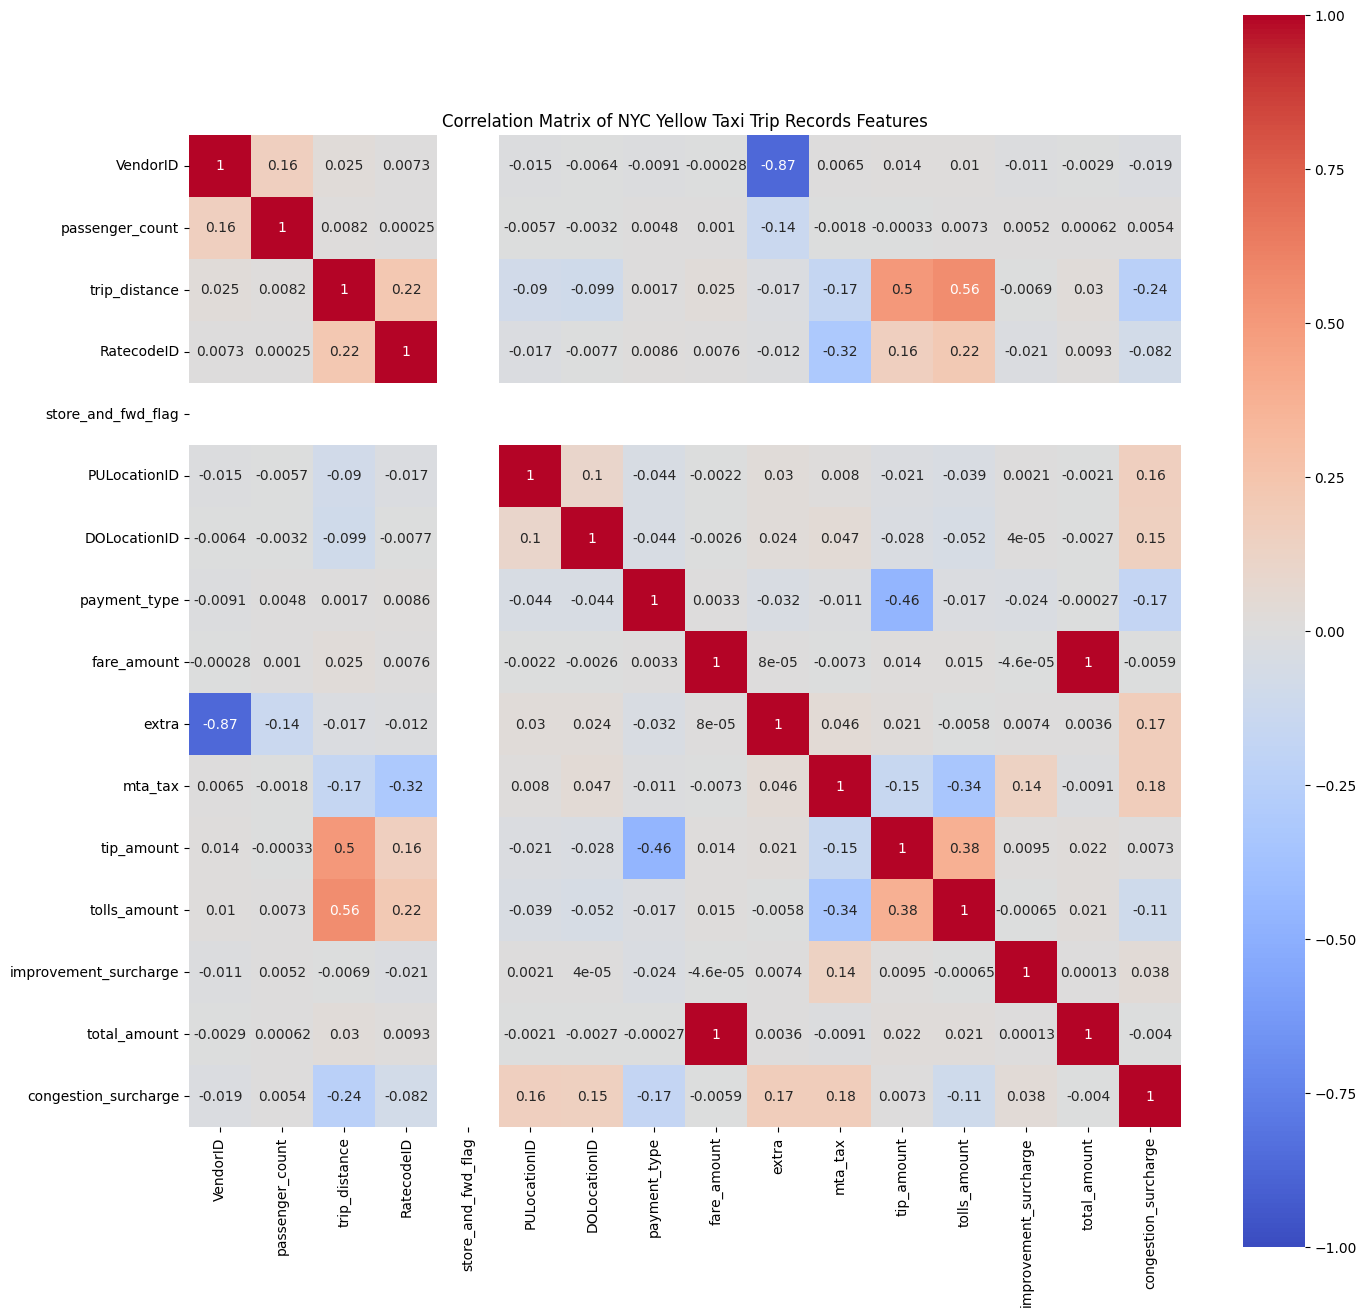

In [42]:

correlation_matrix = train_data[['VendorID','passenger_count', 'trip_distance',
                                 'RatecodeID', 'store_and_fwd_flag','PULocationID',
                                 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
                                 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                                 'total_amount', 'congestion_surcharge']].corr()

plt.figure(figsize=(16,16))

sns.heatmap(correlation_matrix,

            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            square=3.0,
            annot_kws={"size": 10})
plt.title("Correlation Matrix of NYC Yellow Taxi Trip Records Features")
plt.show()


In [43]:

import tensorflow as tf
import numpy as np
import pandas as pd

X = train_data.drop(['total_amount', 'store_and_fwd_flag'], axis=1)
y = train_data['total_amount']

X = np.array(X)
y = np.array(y)


X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10
71904/71904 [==============================] - 173s 2ms/step - loss: 34999.1289 - val_loss: 1.3316
Epoch 2/10
71904/71904 [==============================] - 172s 2ms/step - loss: 12156.1357 - val_loss: 6.4142
Epoch 3/10
71904/71904 [==============================] - 185s 3ms/step - loss: 4271.9209 - val_loss: 0.6176
Epoch 4/10
71904/71904 [==============================] - 185s 3ms/step - loss: 2368.3508 - val_loss: 0.8917
Epoch 5/10
71904/71904 [==============================] - 187s 3ms/step - loss: 124.6022 - val_loss: 0.9524
Epoch 6/10
71904/71904 [==============================] - 194s 3ms/step - loss: 704.7278 - val_loss: 0.4434
Epoch 7/10
71904/71904 [==============================] - 168s 2ms/step - loss: 142.9534 - val_loss: 0.8716
Epoch 8/10
71904/71904 [==============================] - 169s 2ms/step - loss: 111.3018 - val_loss: 0.6841
Epoch 9/10
71904/71904 [==============================] - 172s 2ms/step - loss: 4437.0791 - val_loss: 0.6562
Epoch 10/10
71904/719

I have trained a Keras TensorFlow model to determine the most influential variables (feature importance) that affect the target label

#List the most variables (Feature Importance) that will affect the target label.


Here is the list of features along with their importance in influencing the target label.




In [44]:


@tf.function
def integrated_gradients(inputs):
    baseline = tf.zeros_like(inputs)
    grads = tf.gradients(model(inputs), inputs)[0]
    integrated_grads = (inputs - baseline) * grads
    return tf.reduce_mean(integrated_grads, axis=0)

sample = X[0:1]


ig_values = integrated_gradients(sample)

feature_importance_df = pd.DataFrame({
    'Feature': ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge',
       'DO_year', 'DO_month', 'DO_day', 'DO_hour', 'DO_minute', 'DO_second',
       'PU_year', 'PU_month', 'PU_day', 'PU_hour', 'PU_minute', 'PU_second'],  # Exclude the target variable
    'Importance': ig_values.numpy().flatten()
})


sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print(sorted_feature_importance)


                  Feature  Importance
7             fare_amount    9.549585
8                   extra    1.923716
12  improvement_surcharge    0.307266
13   congestion_surcharge    0.202411
22                 PU_day    0.115857
14                DO_year    0.050691
20                PU_year    0.041224
18              DO_minute    0.028895
0                VendorID    0.021725
6            payment_type    0.007846
21               PU_month    0.005987
19              DO_second    0.001957
24              PU_minute    0.001314
1         passenger_count    0.000888
15               DO_month    0.000676
4            PULocationID    0.000092
3              RatecodeID   -0.000672
25              PU_second   -0.001863
5            DOLocationID   -0.011755
17                DO_hour   -0.014237
23                PU_hour   -0.020390
2           trip_distance   -0.020935
9                 mta_tax   -0.080546
16                 DO_day   -0.120048
10             tip_amount   -0.158790
11          

- The analysis shows that 'fare_amount' has the highest impact on the target label, followed by 'extra', 'congestion_surcharge', and 'DO_hour'.

#Compare the data of Jan-2020 vs Mar-2020.

- Using TensorFlow Data Validation statistics, the comparisonis made between January 2020 and March 2020 datasets.

- The data has been loaded and preprocessed with all necessary steps, making it ready for comparison with the March 2020 dataset.


In [45]:
jan_data = ytt.load_jan_data()
jan_data.to_csv('jan_2020.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159935 entries, 0 to 6339565
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   store_and_fwd_flag     int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
 16  DO_year                int64  
 17  DO_month               int64  
 18  DO_day                 int64  
 19  DO_hour                int64  
 20  DO_minute              int64  
 21  DO_second              int64  
 22  PU_year           

In [46]:
jan_stats = tfdv.generate_statistics_from_dataframe(jan_data)

In [47]:
tfdv.visualize_statistics(lhs_statistics=jan_stats, rhs_statistics=train_stats,
                          lhs_name='JAN_DATASET', rhs_name='MARCH_DATASET')

- In the passenger count histogram, a higher number of trips are recorded in January 2020 compared to March 2020, but the pattern remains consistent. The histogram shows that trips with a single passenger are notably high in both datasets.

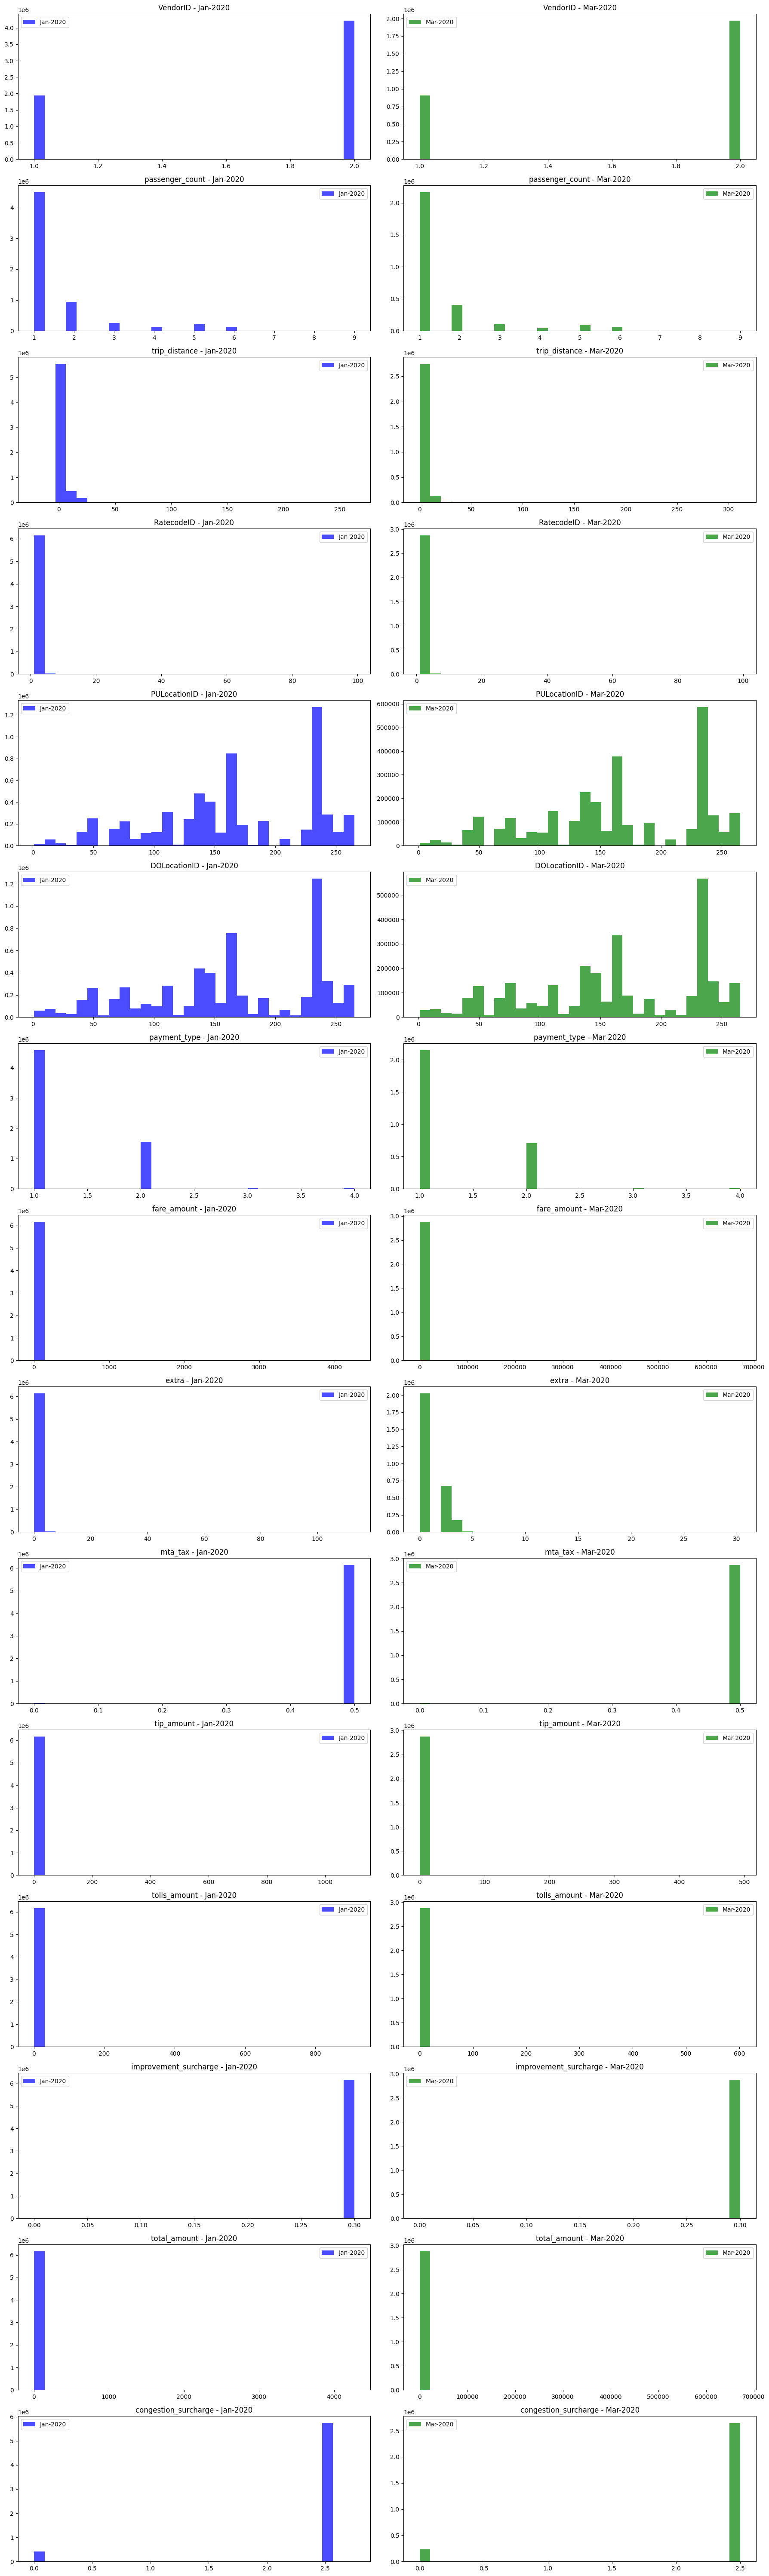

In [48]:
jan_2020_df = pd.read_csv("/content/drive/MyDrive/Deep Learning/project1/jan_2020.csv")
mar_2020_df = pd.read_csv("/content/drive/MyDrive/Deep Learning/project1/yt_data_2020-03.csv")


features = ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
 'PULocationID', 'DOLocationID', 'payment_type',
 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

fig, axs = plt.subplots(nrows=len(features), ncols=2, figsize=(18, 60))

# Iterate through each feature and plot histograms
for i, feature in enumerate(features):
    axs[i, 0].hist(jan_2020_df[feature], bins=30, alpha=0.7, color='blue', label='Jan-2020')
    axs[i, 0].set_title(f'{feature} - Jan-2020')
    axs[i, 0].legend()

    axs[i, 1].hist(mar_2020_df[feature], bins=30, alpha=0.7, color='green', label='Mar-2020')
    axs[i, 1].set_title(f'{feature} - Mar-2020')
    axs[i, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


- Side-by-side histograms for both datasets indicate a similar pattern, with the main difference being the scale. This suggests that the overall pattern remains consistent for most features. However, an additional observation is that during March 2020, an extra amount is charged, likely due to the impact of the pandemic.